In [9]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(font_scale=2)
sns.set_style("whitegrid")

# One dimensional nonlinear equations

In this activity, we will find the root of nonlinear equations using three different iterative methods. For each one, you should be thinking about cost and convergence rate.

The iterative methods below can be applied to more complex equations, but here we will use a simple nonlinear equation of the form:

$$f(x) = e^x - 2 $$

The exact root that satisfies $f(x) = 0$ is $x = ln(2) \approx 0.693147$. We can take a look at the function in the interval $[-2,2]$.


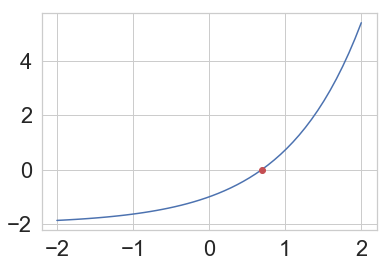

In [63]:
a0 = -2
b0 = 2

x = np.linspace(a0, b0)

def f(x):
    return np.exp(x) - 2

def df(x):
    return np.exp(x)

xtrue = np.log(2)

plt.plot(x, f(x))
plt.plot(xtrue,0,'ro')

## Bisection Method

#### First we will run the iterative process for a few iterations:

In [52]:
a = a0
b = b0
interval = np.abs(a - b)   
errors = []

fa = f(a)

for i in range(12):
    m = (a+b)/2
    fm = f(m)   
    if  np.sign(fa) == np.sign(fm):
        a = m 
        fa = fm # this line is not really needed, 
        # since we only need the sign of a, and sign of a is the same as sign of m
    else:
        b = m
    interval = np.abs(a - b)    
    errors.append(interval)        
    print("%10g \t %10g \t %12g" % (a, b, interval))
    
print('exact root is = ', np.log(2))

         0 	          2 	            2
         0 	          1 	            1
       0.5 	          1 	          0.5
       0.5 	       0.75 	         0.25
     0.625 	       0.75 	        0.125
    0.6875 	       0.75 	       0.0625
    0.6875 	    0.71875 	      0.03125
    0.6875 	   0.703125 	     0.015625
    0.6875 	   0.695312 	    0.0078125
  0.691406 	   0.695312 	   0.00390625
  0.691406 	   0.693359 	   0.00195312
  0.692383 	   0.693359 	  0.000976562
exact root is =  0.6931471805599453


#### Now we will add a stopping criteria. 

Since we know the interval gets divided by two every iteration, how many iterations do we need to perform to achieve the tolerance $2^{-k}$?

Note that only one function evaluation is needed per iteration!

We can also verify the linear convergence, with C = 0.5

In [53]:
a = a0
b = b0
interval = np.abs(a - b)   
errors = [interval]

fa = f(a)
count = 0

while count < 30 and interval > 2**(-4):
    m = (a+b)/2
    fm = f(m)   
    if  fa*fm > 0:
        a = m 
    else:
        b = m
    interval = np.abs(a - b)    
    errors.append(interval)        
    print("%10g \t %10g \t %12g %12g" % (a, b, interval, interval/errors[-2]))
    
print('exact root is = ', np.log(2))

         0 	          2 	            2          0.5
         0 	          1 	            1          0.5
       0.5 	          1 	          0.5          0.5
       0.5 	       0.75 	         0.25          0.5
     0.625 	       0.75 	        0.125          0.5
    0.6875 	       0.75 	       0.0625          0.5
exact root is =  0.6931471805599453


Text(0.5, 0, 'Iterations')

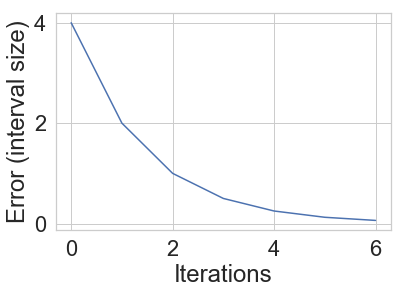

In [58]:
plt.plot(errors)
plt.ylabel('Error (interval size)')
plt.xlabel('Iterations')

What happens if you have multiple roots inside the interval? Bisection method will converge to one of the roots. Try to run the code snippet above using the function 

$$ f(x) = 0.5 x^2 - 2 $$

Change the interval, and observe what happens.

## Newton's Method

In [98]:
x0 = 2
r = 2

In [99]:
x = x0
count = 0
tol = 1e-6
err = 1
errors = [err]

while count < 30 and err > tol:
    x = x - f(x)/df(x)
    err = abs(x-xtrue)
    errors.append(err)
    print('%10g \t%10g \t %.16e %.4g' % (x, f(x), err, errors[-1]/(errors[-2]**r) ))

   1.27067 	   1.56324 	 5.7752338591328012e-01 0.5775
  0.831957 	  0.297812 	 1.3881012318002328e-01 0.4162
  0.702351 	 0.0184918 	 9.2034034572215928e-03 0.4776
  0.693189 	8.44452e-05 	 4.2221690566890402e-05 0.4985
  0.693147 	1.78265e-09 	 8.9132301539507353e-10 0.5


## Secant Method

In [94]:
x0 = 2
x1 = 8
r = 2
#r = 1.618

In [95]:
# Need two initial guesses
xbefore = x0
x = x1
count = 0
tol = 1e-8
err = 1
errors = [err]

while count < 30 and err > tol:

    df_approx = (f(x)-f(xbefore))/(x-xbefore)
    xbefore = x
    x = x - f(x)/df_approx
    err = abs(x-xtrue)
    errors.append(err)
    print('%10g \t%10g \t %.16e %.4g' % (x, f(x), err, errors[-1]/errors[-2]**r ))

   1.98913 	   5.30914 	 1.2959789041737508e+00 1.296
   1.97839 	   5.23112 	 1.2852471085772197e+00 0.8449
   1.25885 	   1.52137 	 5.6570418067033190e-01 0.3769
  0.963766 	  0.621549 	 2.7061833731723317e-01 0.6802
  0.759937 	   0.13814 	 6.6789331877922575e-02 0.5535
   0.70169 	 0.0171582 	 8.5425082065405666e-03 0.6811
  0.693429 	0.000563492 	 2.8170616606482124e-04 0.6259
  0.693148 	2.40294e-06 	 1.2014692549744410e-06 0.6667
  0.693147 	3.38445e-10 	 1.6922274692632300e-10 0.6419


# N-Dimensional Nonlinear Equations

We will solve the following system of nonlinear equations:

$$ x + 2y = 2 $$

$$ x^2 + 4y^2 = 4 $$

We will define our vector valued function ${\bf f}$, which takes a vector as argument, with the components $x$ and $y$. We are trying to find the numerical (approximated) solution that safisfies:

$${\bf f} = \begin{bmatrix} f_1 \\ f_2 \end{bmatrix}
          = \begin{bmatrix} x + 2y - 2 \\ x^2 + 4y^2 - 4 \end{bmatrix}
          = \begin{bmatrix} 0 \\ 0 \end{bmatrix}$$
          
and the exact solution is $[0,1]$

We will also define the gradient of ${\bf f}$, $\nabla{\bf f}$, which we call the Jacobian.

### Newton's method

In [11]:
def f(xvec):
    x, y = xvec
    return np.array([
        x + 2*y -2,
        x**2 + 4*y**2 - 4
        ])

def Jf(xvec):
    x, y = xvec
    return np.array([
        [1, 2],
        [2*x, 8*y]
        ])

Pick an initial guess.

In [15]:
x = np.array([1, 2])

Now implement Newton's method.

In [16]:
for i in range(10):
    s = la.solve(Jf(x), -f(x))
    x = x + s
x

array([1.50295992e-16, 1.00000000e+00])

Check if that's really a solution:

In [17]:
f(x)

array([0., 0.])

The cost is $O(n^3)$ per iteration, since the Jacobian changes every iteration. But how fast is the convergence?

In [31]:
r = 2

xtrue = np.array([0, 1])
x = np.array([1, 2])
errors = [la.norm(x)]

while errors[-1] > 1e-12:
    A = Jf(x)
    s = la.solve(A, f(x))
    x = x - s
    err = la.norm(x-xtrue)
    errors.append(err)
    print(' %.16e \t %.4g' % (err, errors[-1]/errors[-2]**r ))

 9.3169499062491201e-01 	 0.1863
 2.1174886150566186e-01 	 0.2439
 1.6858985788667225e-02 	 0.376
 1.2522123592245921e-04 	 0.4406
 7.0116836915221782e-09 	 0.4472
 1.5029599174076677e-16 	 3.057


### Finite Difference

Suppose you don't know how to calculate the Jacobian. You can use Forward Finite Difference to approximate the derivatives! 

In [152]:
def fd(xvec,dx):
    fval = f(xvec)
    J = np.zeros((fval.shape[0],xvec.shape[0]))
    for j in range(len(xvec)):
        xvec[j] = xvec[j] + dx
        dfd = f(xvec)-fval
        for i in range(len(fval)):
            J[i,j] = dfd[i]/dx
        xvec[j] = xvec[j] - dx
    return J

In [155]:
x = np.array([4, 2],dtype=float)
fd(x,0.0001)

array([[ 1.    ,  2.    ],
       [ 8.0001, 16.0004]])

In [156]:
Jf(np.array([4,2]))

array([[ 1,  2],
       [ 8, 16]])